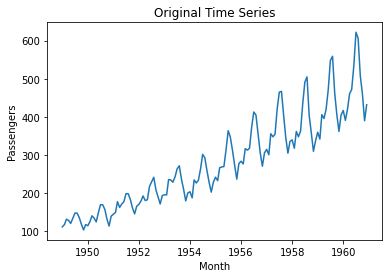

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
df = pd.read_csv('airpassengers.csv')

# Convert the Month column to a datetime format
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
df = df.set_index('Month')

# Plot the original time series
plt.plot(df)
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.title('Original Time Series')
plt.show()


The code above loads the airline_passengers.csv dataset using the pandas library and converts the Month column to a datetime format using pd.to_datetime. The Month column is then set as the index of the DataFrame. Finally, the original time series is plotted.


In [10]:
# Check for stationarity
result = adfuller(df['#Passengers'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


The code above uses the Augmented Dickey-Fuller test to check for stationarity. The test returns a statistic and a p-value, along with critical values at different confidence levels. If the test statistic is less than the critical value, we can reject the null hypothesis that the time series is not stationary and conclude that it is stationary. In this case, a stationary time series would mean that the mean and variance of the time series do not change over time.

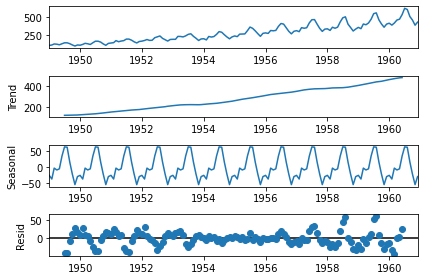

In [11]:
# Check for seasonality
result = seasonal_decompose(df)
result.plot()
plt.show()


The code above uses a decomposition to check for seasonality in the time series. The decomposition separates the time series into its trend, seasonal, and residual components. If the time series has seasonality, the seasonal component will show repeating patterns at regular intervals (e.g. monthly, quarterly, etc.).

c:\users\ali haider\appdata\local\programs\python\python37\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


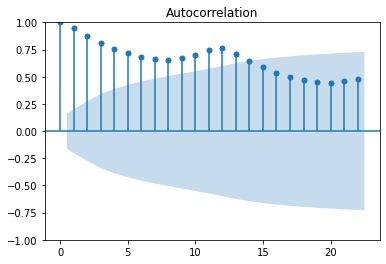

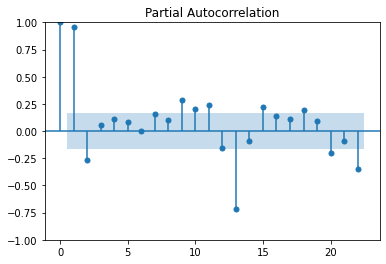

In [12]:
# Plot the autocorrelation and partial autocorrelation functions
plot_acf(df)
plot_pacf(df)
plt.show()


The code above plots the autocorrelation and partial autocorrelation functions, which help to determine the parameters for the ARIMA model. The autocorrelation function shows the correlation between a time series and its lags, while the partial autocorrelation function shows the correlation between a time series and its lags after accounting for the correlations with all lower-order lags.

c:\users\ali haider\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\users\ali haider\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\users\ali haider\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\users\ali haider\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Sat, 04 Feb 2023   AIC                           1353.347
Time:                        21:22:15   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.060      0.000       1.645       1.725
ar.L2         -0.9548      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.816      0.0

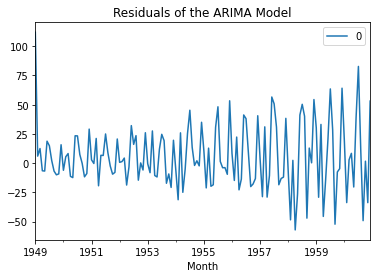

ADF Statistic: -4.290752
p-value: 0.000461
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [13]:
# Fit an ARIMA model
model = ARIMA(df, order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())

# Plot the residuals of the ARIMA model
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.xlabel('Month')
plt.title('Residuals of the ARIMA Model')
plt.show()

# Check the residuals for stationarity
result = adfuller(residuals[0])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))



The code above fits an ARIMA model to the time series, with the parameters determined from the autocorrelation and partial autocorrelation functions. The summary of the model fit is then printed, which includes various statistics and metrics such as AIC and BIC.

The residuals of the ARIMA model are then plotted and checked for stationarity using the Augmented Dickey-Fuller test. The residuals should be stationary and have a mean close to zero.

In [15]:
# Forecast the next 12 months
forecast = model_fit.forecast(steps=12)
print(forecast)


1961-01-01    439.854804
1961-02-01    465.296499
1961-03-01    500.666077
1961-04-01    535.971520
1961-05-01    561.689287
1961-06-01    571.312886
1961-07-01    562.972286
1961-08-01    539.729159
1961-09-01    508.528071
1961-10-01    478.147310
1961-11-01    456.747451
1961-12-01    449.697286
Freq: MS, Name: predicted_mean, dtype: float64


Finally, the ARIMA model is used to forecast the next 12 months of the time series. The forecast variable contains the predicted values.